In [ ]:
## Business Understanding - Describe the purpose of the data set you selected. (Salomon)


In [ ]:
## Data Understanding - Describe the meaning and type of data for each attribute. (Scott)


In [1]:
## Data Understanding - Verify data quality (Earl)

# Loading relevant libraries used throughout the analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

# Loading the "DelayedFlights.csv" data set
bank=pd.read_csv('C:\\Users\\Earl\\Documents\\MSDS 7331\\Data\\Lab 1\\bank_data.csv')
# https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# Number of rows in data set (41,187 rows total)

In [2]:
bank.head(10) # Initial view of data set
# age: The client's age
# job: type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid','management', 
# 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
# marital: marital status (categorical: 'divorced', 'married', 'single', 'unknown', 'note: 'divorced or widowed')
# education: (categorical: 'basic.4y' ,'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 
# 'university.degree', 'uknown')
# default: has credit in default? (categorical: 'no', 'yes', 'unkown')
# housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
# loan: has personal loan? (categorical: 'no', 'yes' ,'unknown'); related with the last contact of the current campaign
# contact: contact communication type (categorical: 'cellular', 'telephone')
# month: last contact month of year (categorical: 'jan' ,'feb' ,'mar', ... ,'nov', 'dec')
# day_of_week: last contact day of the week (categorical: 'mon', 'tue','wed', 'thu', 'fri')
# duration: last contacat duration, in seconds (numeric)
# campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
# pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric;
# '999' means client was not previously contacted)
# previous: number of contacts performed before this campaign and for this client (numeric)
# poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')
# emp.var.rate: employment variation rate - quarterly indicator (numeric)
# cons.price.idx: consumer price index - monthly indicator (numeric)
# cons.conf.idx: consumer confidence index - monthly indicator (numeric)
# euribor3m: euribor 3 month rate - daily indicator (numeric)
# nr.employed: number of employees - quarterly indicator (numeric)
# y: has the client subscribed to a term deposit (binary: 'yes', 'no)

# Source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
print ('-----------------------------------------')
print ('Summary Statistics Prior to Data Handling')
print ('-----------------------------------------')
bank.describe() # Summary statistics, excluding NaN values

-----------------------------------------
Summary Statistics Prior to Data Handling
-----------------------------------------


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
# Checking variable types of features in the data set and examining counts.
print ('----------------------------------------------------')
print ('Data Types and Missing Values Prior to Data Handling')
print ('----------------------------------------------------')
print (bank.info()) # Summary of data set

# Missing Value Handling
# ----------------------
# There are no missing values for any observations in this data set and all variables were the right type, given
# their values.
print ('*Note: No missing values to impute.')

----------------------------------------------------
Data Types and Missing Values Prior to Data Handling
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m     

In [99]:
# Removing duplicate observations/clients from dataset
bank2=bank.drop_duplicates()

# Checking variable types of features in the data set and examining counts after removing duplicates
print ('--------------------------------------------------------------')
print ('Data Types and Missing Values after Removing Duplicate Records')
print ('--------------------------------------------------------------')
bank2.info()
print ('*Note: 11 observations were removed due to being duplicates.')
print ('**41,176 observations remain for analysis.')

--------------------------------------------------------------
Data Types and Missing Values after Removing Duplicate Records
--------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
age               41176 non-null int64
job               41176 non-null object
marital           41176 non-null object
education         41176 non-null object
default           41176 non-null object
housing           41176 non-null object
loan              41176 non-null object
contact           41176 non-null object
month             41176 non-null object
day_of_week       41176 non-null object
duration          41176 non-null int64
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
poutcome          41176 non-null object
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 n

In [100]:
print ('--------------------------------------------------------------')
print ('Re-checking Summary Statistics after Removing Duplicate Values')
print ('--------------------------------------------------------------')
print (bank2.describe())
print ("Judging by the standard deviation (i.e. 'std') and 'max' values for the continuous variables below")
print ("outliers do not appear to be a significant issue, as the deviations are reasonably low.")

--------------------------------------------------------------
Re-checking Summary Statistics after Removing Duplicate Values
--------------------------------------------------------------
               age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41176.000000    4117

In [101]:
# Changing variable names to avoid syntax issues within the Python operating environment and to more intuitive names.
bank3=bank2.rename(columns={'job':'job_type','marital':'marital_status','education':'education_level',
                            'default':'curr_credit_default','housing':'curr_housing_loan','contact':'contact_type',
                            'loan':'curr_personal_loan','month':'last_contact_month','day_of_week':'last_contact_day',
                            'pdays':'days_since_last_contact','previous':'num_contacts_pre_campaign',
                            'poutcome':'prior_campaign_outcome','emp.var.rate':'emp_var_rate','campaign':'num_campaign_contacts',
                            'cons.price.idx':'cons_price_idx','cons.conf.idx':'cons_conf_idx','nr.employed':'num_employees_qtr','y':'target'})
# New variable names:
# -------------------
# age = age
# job = job_type
# marital = marital_status
# education  = education_level
# default = curr_credit_default
# housing = curr_housing_loan
# loan = curr_personal_loan
# contact = contact_type
# month = last_contact_month
# day_of_week = last_contact_day
# duration = duration
# campaign = num_campaign_contacts
# pdays = days_since_lasts_contact
# previous = num_contacts_pre_campaign
# poutcome = prior_campaign_outcome
# emp.var.rate = emp_var_rate
# cons.price.idx = cons_price_idx
# euribor3m = euribor3m
# nr.employed = num_employees_qtr
# y = target

# Re-checking variable names
print ('----------------------')
print ('Updated Variable Names')
print ('----------------------')
bank3.info()

----------------------
Updated Variable Names
----------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
age                          41176 non-null int64
job_type                     41176 non-null object
marital_status               41176 non-null object
education_level              41176 non-null object
curr_credit_default          41176 non-null object
curr_housing_loan            41176 non-null object
curr_personal_loan           41176 non-null object
contact_type                 41176 non-null object
last_contact_month           41176 non-null object
last_contact_day             41176 non-null object
duration                     41176 non-null int64
num_campaign_contacts        41176 non-null int64
days_since_last_contact      41176 non-null int64
num_contacts_pre_campaign    41176 non-null int64
prior_campaign_outcome       41176 non-null object
emp_var_rate                 41176 non-null float64
cons_price

----------------
Box Plot - 'age'
----------------


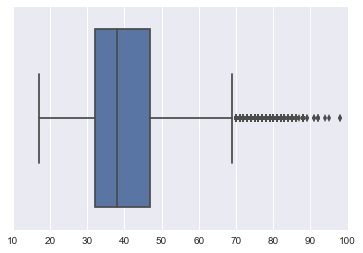

In [79]:
# Double check of outlier values using box plots --Judging by the box plot below, outliers do not appear to be an issue.
print ('----------------')
print ("Box Plot - 'age'")
print ('----------------')
sns.boxplot([bank3.age])

----------------------------------
Box Plot - 'num_campaign_contacts'
----------------------------------
Axes(0.125,0.125;0.775x0.775)


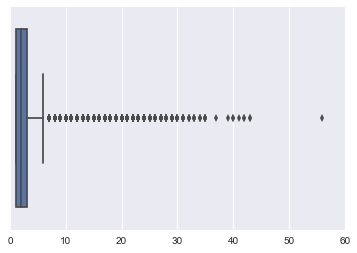

In [78]:
# Double check of outlier values using box plots --Judging by the box plot below, outliers appear reasonable given the
# context. That is, this variable represents how many times the client was contacted during the campaign, which could 
# vary depending on the caller's judgment on how responsive the client may be.
print ('----------------------------------')
print ("Box Plot - 'num_campaign_contacts'")
print ('----------------------------------')
print (sns.boxplot([bank3.num_campaign_contacts]))

------------------------------------
Box Plot - 'days_since_last_contact'
------------------------------------


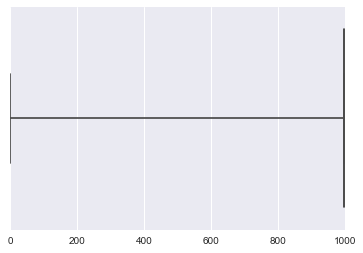

In [80]:
# Double check of outlier values using box plots --Judging by the box plot below, outliers do not appear to be an issue
# as the many '999' values in the data set indicate the client was not contacted.
print ('------------------------------------')
print ("Box Plot - 'days_since_last_contact'")
print ('------------------------------------')
sns.boxplot([bank3.days_since_last_contact])

------------------------------
Box Plot - 'num_employees_qtr'
------------------------------


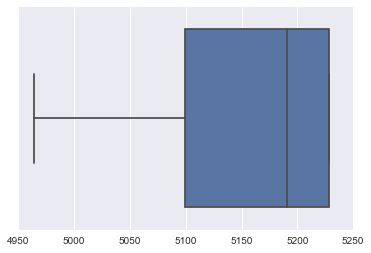

In [82]:
# Double check of outlier values using box plots --Judging by the box plot below, outliers do not appear to be an issue.
print ('------------------------------')
print ("Box Plot - 'num_employees_qtr'")
print ('------------------------------')
sns.boxplot([bank3.num_employees_qtr])

---------------------------
Box Plot - 'cons_price_idx'
---------------------------


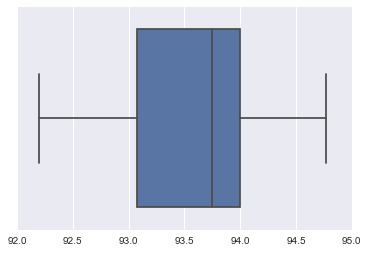

In [83]:
# Double check of outlier values using box plots  --Judging by the box plot below, outliers do not appear to be an issue.
print ('---------------------------')
print ("Box Plot - 'cons_price_idx'")
print ('---------------------------')
sns.boxplot([bank3.cons_price_idx])

----------------------
Box Plot - 'euribor3m'
----------------------


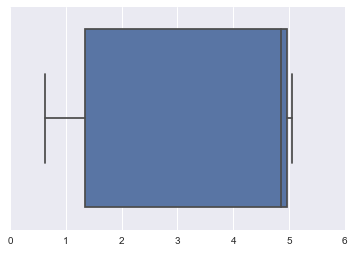

In [84]:
# Double check of outlier values using box plots --Judging by the box plot below, outliers do not appear to be an issue.
print ('----------------------')
print ("Box Plot - 'euribor3m'")
print ('----------------------')
sns.boxplot([bank3.euribor3m])


-------------------------
Box Plot - 'emp_var_rate'
-------------------------


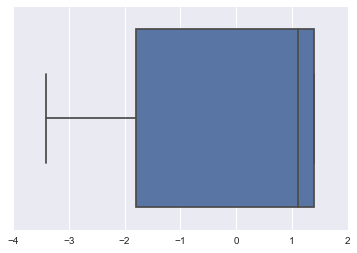

In [85]:
# Double check of outlier values using box plots  --Judging by the box plot below, outliers do not appear to be an issue.
print ('-------------------------')
print ("Box Plot - 'emp_var_rate'")
print ('-------------------------')
sns.boxplot([bank3.emp_var_rate])


In [102]:
# Creating Dummy binary variable for 'target' variable to use for counts, etc.
target_2=[]
for row in bank3['target']:
    if row=='yes':
        target_2.append(1)
    else:
        target_2.append(0)
bank3['target_2']=target_2

# Creating Dummy count variable.
counter=[]
for row in bank3['target']:
    counter.append(1)
bank3['counter']=counter

# Source: http://chrisalbon.com/python/pandas_create_column_with_loop.html

In [103]:
# Check to see if "target_2" and "counter" dummy variables were created appropriateley.
print ('---------------------------------------------------------------------------')
print ("Checking 'target_2' and 'counter' dummy variable for proper type and values")
print ('---------------------------------------------------------------------------')
print ('Type')
print (bank3.info())
print ('')
print ('Values')
print (bank3.describe())


---------------------------------------------------------------------------
Checking 'target_2' and 'counter' dummy variable for proper type and values
---------------------------------------------------------------------------
Type
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 23 columns):
age                          41176 non-null int64
job_type                     41176 non-null object
marital_status               41176 non-null object
education_level              41176 non-null object
curr_credit_default          41176 non-null object
curr_housing_loan            41176 non-null object
curr_personal_loan           41176 non-null object
contact_type                 41176 non-null object
last_contact_month           41176 non-null object
last_contact_day             41176 non-null object
duration                     41176 non-null int64
num_campaign_contacts        41176 non-null int64
days_since_last_contact      41176 non-null int64

In [132]:
# Percentage of clients with a term deposit
print ('-----------------------------------------')
print ('Percentage Of Clients with a Term Deposit')
print ('-----------------------------------------')
x=bank3['target_2'].sum()
y=bank3['counter'].sum()
print (float(x)/y)*100.0

-----------------------------------------
Percentage Of Clients with a Term Deposit
-----------------------------------------
11.2662716145


In [159]:
# Summary Statistics - Percentage of Clients with Term Deposit by Job Type
# i.e. How many subscribers have a term deposit per job type?
bank3_grouped_by_job=bank3.groupby(by='job_type') # Creating group by 'job_type' and 'target_2'
print ('')
print ('--------------------------------------------------')
print ('Percentage Distribution of Subscribers by Job Type')
print ('--------------------------------------------------')
print ('*i.e. What percentage of subscribers have a term deposit by job type?')
print (bank3_grouped_by_job.target_2.sum()/bank3['target_2'].sum())*100.0    # Percentage of subscribers by job type
print ('')
print ('------')
print ('Notes:')
print ('------')
print ("-->Judging by the above results, the majority of subscribers have 'administrative' or 'technical' jobs.")
print ("- 'Administrative' job holders makes sense considering their incomes are probably higher providing them with extra")
print ("disposable income to allocate for interest gaining purposes.")
print ("--> While the lowest occuring known group is 'housemaids', which is not beyond expectation.")
print ("--> A surprising result is that a smaller percentage of subscribers are 'entrpreneurs', which one would think would be higher, given")
print ("the tendency for a higher degree of risk and hence a higher income. However, the data represents individuals")
print ("in Portugal where the entrepreneurial climate may be different than that in the US. Additionally, a reasonable")
print ("hypothesis would be that those in 'management' jobs would represent a higher percentage, but that doesn't appear to be the case.")
print ('')

# Summary Statistics - Percentage of Clients with Term Deposit by Marital Status
# i.e. What percentage of subscribers have a term deposit by marital status?
bank3_grouped_by_marital=bank3.groupby(by='marital_status') # Creating group by 'marital_status' and 'target_2'
print ('')
print ('--------------------------------------------------------')
print ('Percentage Distribution of Subscribers by Marital Status')
print ('--------------------------------------------------------')
print ('*i.e. What percentage of subscribers have a term deposit by marital status?')
print (bank3_grouped_by_marital.target_2.sum()/bank3['target_2'].sum())*100.0  # Percentage of subscribers by marital status
print ('')
print ('------')
print ('Notes:')
print ('------')
print ("--> The above results suggest over half of 'married' individuals possess a term deposit compared")
print ("to 'single' or 'divorced' individuals. This follows logically, as married individuals typically are in a situation")
print ("in which both spouses are employed, thereby providing additional income able to be used for a more")
print ("discretionary pursuit.")
print ('')

# Summary Statistics - Percentage of Clients with Term Deposit by 'curr_credit_default'
# i.e. How many subscribers have a term deposit given a current credit default?
bank3_grouped_by_default=bank3.groupby(by='curr_credit_default') # Creating group by 'curr_credit_default' and 'target_2'
print ('')
print ('--------------------------------------------------------------------------')
print ('Percentage Distribution of Subscribers based on Current Loan Default Status')
print ('--------------------------------------------------------------------------')
print ('*i.e. What percentage of subscribers have a term deposit by current credit status?')
print (bank3_grouped_by_default.target_2.sum()/bank3['target_2'].sum())*100.0  # Percentage of subscribers by current credit status
print ('')
print ('------')
print ('Notes:')
print ('------')
print ("--> The above results overwhelmingly suggest that individuals with no current credit defaults")
print ("are much more likely to have a term deposit.")


--------------------------------------------------
Percentage Distribution of Subscribers by Job Type
--------------------------------------------------
*i.e. What percentage of subscribers have a term deposit by job type?
job_type
admin.           29.122656
blue-collar      13.752964
entrepreneur      2.672990
housemaid         2.284975
management        7.070489
retired           9.355465
self-employed     3.211899
services          6.962707
student           5.928002
technician       15.736150
unemployed        3.104117
unknown           0.797586
Name: target_2, dtype: float64

------
Notes:
------
-->Judging by the above results, the majority of subscribers have 'administrative' or 'technical' jobs.
- 'Administrative' job holders makes sense considering their incomes are probably higher providing them with extra
disposable income to allocate for interest gaining purposes.
--> While the lowest occuring known group is 'housemaids', which is not beyond expectation.
--> A surprising r

In [160]:
# Summary Statistics - Percentage of Clients with Term Deposit by 'Age Bins'
# i.e. What percentage of subscribers have a term deposit by age bin?
bank3['age_range'] = pd.cut(bank3.age,[0,17,24,34,44,54,64,74,100],8,labels=['<=17','18-24','25-34','35-44','45-54','55-64','65-74','75+'])

# Summary Statistics - Percentage of Clients with Term Deposit by 'curr_credit_default'
# i.e. How many subscribers have a term deposit given a current credit default?
bank3_grouped_by_age=bank3.groupby(by='age_range') # Creating group by 'age'
print ('')
print ('-------------------------------------------------')
print ('Percentage Distribution of Subscribers by Age Bin')
print ('-------------------------------------------------')
print ('*i.e. What percentage of subscribers have a term deposit by age group?')
print (bank3_grouped_by_age.target_2.sum()/bank3['target_2'].sum())*100.0  # Percentage of subscribers by current credit status
print ('')
print ('------')
print ('Notes:')
print ('------')
print ("--> The above results suggest over 75% of term deposit subscribers are between the ages of 25-54, with")
print ("the largest percentage represented by those 25-34 years old. This intuitively makes sense as this group of")
print ("individuals have probably settled into a career and are experiencing a steady income rise.")


-------------------------------------------------
Percentage Distribution of Subscribers by Age Bin
-------------------------------------------------
*i.e. What percentage of subscribers have a term deposit by age group?
age_range
<=17      0.043113
18-24     5.475318
25-34    35.912912
35-44    25.177840
45-54    16.210390
55-64    10.433283
65-74     3.729252
75+       3.017892
Name: target_2, dtype: float64

------
Notes:
------
--> The above results suggest over 75% of term deposit subscribers are between the ages of 25-54, with
the largest percentage represented by those 25-34 years old. This intuitively makes sense as this group of
individuals have probably settled into a career and are experiencing a steady income rise.


Notes:
------
--> As noticed earlier, the below graph suggests those with an 'admin' job type represent a higher percentage of
individuals with a term deposit relative to those with other job types.


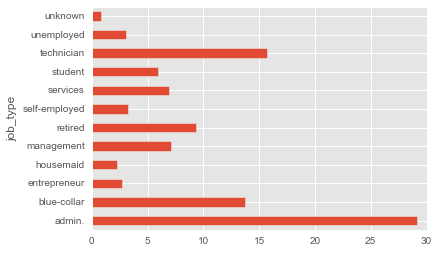

In [161]:
## Visualize appropriate statistics for a subset of attributes. (Earl)
# Percentage of Subscribers by Job Type
plt.style.use('ggplot')
bank3_grouped_by_job=bank3.groupby(by='job_type')
subscriber_rate_by_job=(bank3_grouped_by_job.target_2.sum()/bank3['target_2'].sum())*100.0
#print ('Percentage of Subscribers of Term Deposits by Job Type')
ax=subscriber_rate_by_job.plot(kind='barh')
print ('Notes:')
print ('------')
print ("--> As noticed earlier, the below graph suggests those with an 'admin' job type represent a higher percentage of")
print ("individuals with a term deposit relative to those with other job types.")

Notes:
------
--> The below graph sugggests that two groups represent a higher proportion of those subscribing to a
term deposit relative to other groups, namely, 'married, with a university degree' and 'single, with a
university degree. This intuitively follows as those with more education will most likely have higher incomes
and hence access to more discretionary income to use for a term deposit, relative to other groups.
Additionally, it's reasonable to assume that more education will influence how an individual allocates their
resources, with potentially more used for investment as they plan for future costs.


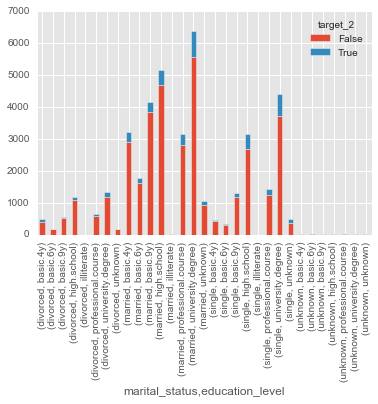

In [162]:
## Visualize appropriate statistics for a subset of attributes. (Earl)
# Frequency of Subscribers by Marital Status and Education Level
subscriber_counts = pd.crosstab([bank3['marital_status'],bank3['education_level']], 
                              bank3.target_2.astype(bool))
subscriber_counts.plot(kind='bar', 
                     stacked=True)
print ('Notes:')
print ('------')
print ("--> The below graph sugggests that two groups represent a higher proportion of those subscribing to a")
print ("term deposit relative to other groups, namely, 'married, with a university degree' and 'single, with a")
print ("university degree. This intuitively follows as those with more education will most likely have higher incomes")
print ("and hence access to more discretionary income to use for a term deposit, relative to other groups.")
print ("Additionally, it's reasonable to assume that more education will influence how an individual allocates their")
print ("resources, with potentially more used for investment as they plan for future costs.")

In [ ]:
## Visualize the most interesting attributes with interpretations. (Marvin)


In [ ]:
## Visualize relationships between attributes. (Marvin)


In [ ]:
## Identify and explain interesting relationships between features and class to predict. (Salomon)

In [ ]:
## Other features to add. (Scott)


In [ ]:
## Additional Analysis (e.g. PCA with visualization and interpretation) (All)
